# Apple Music Data Project

This project focuses on a dataset which was requested from apple data privacy and includes various information in relation to my music listening. The aim of the project is to find interesting insights into my music listening habits.

This type of data can be requested from apple provided a valid apple ID is used. The data can then be requested from their 'Data and Privacy' page. 

The project works with two different types of dataset: My library data (data about the songs in my library) and my listening data (data about how I listen to my library since I started using the streaming service)

Readying the workspace with 'imports' and such

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import string

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

In [2]:
#Importing the listening and library dataset into the workspace. 

In [3]:
csv_filepath = 'Apple Music Play Activity.csv'
listening_data = pd.read_csv(csv_filepath)
listening_data

json_tracks_filepath = 'Apple Music Library Tracks.json'
library_data = pd.read_json(json_tracks_filepath)
pd.set_option('display.max_columns', None)
library_data


,Content Type,Track Identifier,Title,Sort Name,Artist,Sort Artist,Is Part of Compilation,Album,Sort Album,Album Artist,Genre,Track Year,Track Number On Album,Track Count On Album,Disc Number Of Album,Disc Count Of Album,Track Duration,Track Play Count,Date Added To Library,Date Added To iCloud Music Library,Last Modified Date,Last Played Date,Skip Count,Date of Last Skip,Is Purchased,Audio File Extension,Is Checked,Copyright,Release Date,Purchased Track Identifier,Apple Music Track Identifier,Composer,Tag Matched Track Identifier,Track Like Rating,Album Like Rating,Comments,Purchase Date,Rating,Album Rating,Remember Playback Position,Album Rating Method,Playlist Only Track,Display Work Name,Grouping
0,Song,182857262,The Library (Intro),Library (Intro),Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,1,19,1,1,4812,28,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-03-22T12:43:32Z,4,2018-01-23T23:11:57Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Song,182857266,I. Crawl,I. Crawl,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,2,19,1,1,209473,14,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-04-26T01:01:37Z,2,2018-04-19T20:52:44Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Song,182857270,II. Worldstar,II. Worldstar,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,3,19,1,1,244652,10,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2017-12-10T02:01:10Z,4,2018-04-27T02:08:21Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Song,182857474,Dial Up,Dial Up,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,4,19,1,1,44536,14,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-05-06T15:08:06Z,6,2018-03-08T22:33:43Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Song,182857478,I. The Worst Guys (feat. Chance the Rapper),I. The Worst Guys (feat. Chance the Rapper),Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,5,19,1,1,219740,15,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-07-19T19:10:32Z,0,NaN,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Song,182895118,All Night,All Night,The Vamps & Matoma,Vamps & Matoma,False,Night & Day (Night Edition) [Deluxe Version],Night & Day (Night Edition) [Deluxe Version],The Vamps,Pop,2016,2,10,1,1,197640,0,2020-06-13T20:59:04Z,2020-06-13T20:59:04Z,2020-06-13T20:59:04Z,NaN,0,NaN,False,m4a,False,"℗ 2017 Virgin EMI Records, a division of Unive...",2016-10-14T05:00:00Z,1.440900e+09,1.440900e+09,"Bradley Simpson, James McVey, Connor Ball, Tri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,Song,182895122,Rover (feat. DTG),Rover (feat. DTG),S1mba,S1mba,False,Rover (feat. DTG) - Single,Rover (feat. DTG) - Single,S1mba,Hip-Hop/Rap,2020,1,1,1,1,167917,0,2020-06-16T01:24:34Z,2020-06-16T01:24:34Z,2020-06-16T01:24:34Z,NaN,0,NaN,False,m4a,False,℗ 2020 Rax Productions Limited under exclusive...,2020-03-04T00:00:00Z,1.501569e+09,1.501569e+09,"Ayodeji Araoye, Leonard Simbarashe Rwodzi & Ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2066,Song,1

Let's explore the possibilities of the dataset by looking at the columns 

In [4]:
#Cleaning up the data set
library_data = library_data.drop(library_data.columns[32:len(library_data.columns)], axis=1)     
library_data
    

,Content Type,Track Identifier,Title,Sort Name,Artist,Sort Artist,Is Part of Compilation,Album,Sort Album,Album Artist,Genre,Track Year,Track Number On Album,Track Count On Album,Disc Number Of Album,Disc Count Of Album,Track Duration,Track Play Count,Date Added To Library,Date Added To iCloud Music Library,Last Modified Date,Last Played Date,Skip Count,Date of Last Skip,Is Purchased,Audio File Extension,Is Checked,Copyright,Release Date,Purchased Track Identifier,Apple Music Track Identifier,Composer
0,Song,182857262,The Library (Intro),Library (Intro),Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,1,19,1,1,4812,28,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-03-22T12:43:32Z,4,2018-01-23T23:11:57Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN
1,Song,182857266,I. Crawl,I. Crawl,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,2,19,1,1,209473,14,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-04-26T01:01:37Z,2,2018-04-19T20:52:44Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN
2,Song,182857270,II. Worldstar,II. Worldstar,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,3,19,1,1,244652,10,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2017-12-10T02:01:10Z,4,2018-04-27T02:08:21Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN
3,Song,182857474,Dial Up,Dial Up,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,4,19,1,1,44536,14,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-05-06T15:08:06Z,6,2018-03-08T22:33:43Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN
4,Song,182857478,I. The Worst Guys (feat. Chance the Rapper),I. The Worst Guys (feat. Chance the Rapper),Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,5,19,1,1,219740,15,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-07-19T19:10:32Z,0,NaN,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Song,182895118,All Night,All Night,The Vamps & Matoma,Vamps & Matoma,False,Night & Day (Night Edition) [Deluxe Version],Night & Day (Night Edition) [Deluxe Version],The Vamps,Pop,2016,2,10,1,1,197640,0,2020-06-13T20:59:04Z,2020-06-13T20:59:04Z,2020-06-13T20:59:04Z,NaN,0,NaN,False,m4a,False,"℗ 2017 Virgin EMI Records, a division of Unive...",2016-10-14T05:00:00Z,1.440900e+09,1.440900e+09,"Bradley Simpson, James McVey, Connor Ball, Tri..."
2065,Song,182895122,Rover (feat. DTG),Rover (feat. DTG),S1mba,S1mba,False,Rover (feat. DTG) - Single,Rover (feat. DTG) - Single,S1mba,Hip-Hop/Rap,2020,1,1,1,1,167917,0,2020-06-16T01:24:34Z,2020-06-16T01:24:34Z,2020-06-16T01:24:34Z,NaN,0,NaN,False,m4a,False,℗ 2020 Rax Productions Limited under exclusive...,2020-03-04T00:00:00Z,1.501569e+09,1.501569e+09,"Ayodeji Araoye, Leonard Simbarashe Rwodzi & Ty..."
2066,Song,182895126,21,21,Polo G,Polo G,False,THE GOAT,GOAT,Polo G,Hip-Hop/Rap,2020,6,16,1,1,163798,0,2020-06-16T01:35:45Z,2020-06-16T01:35:45Z,2020-06-16T01:35:45Z,NaN,0,NaN,False,m4a,False,"℗ 2020 Columbia Records, a Division of Sony Mu...",2020-05-15T00:00:00Z,1.511794e+09,1.511794e+09,"Taurus Bartlett, Khaled Rohaim & Keanu Dean To..."
2067,Song,182895130,Tommy Lee (feat. Post Malone),Tommy Lee (feat. Post Malone),Tyla Yaweh,Tyla Yaweh,False,Tommy Lee (feat. Post Malone) - Single,Tommy Lee (feat. Post Malone) - Single,Tyla Yaweh,Hip-Hop/Rap,2020,1,1,1,1,224638,0,2020-06-21T02:20:42Z,202

In [5]:
library_data.columns

Index(['Content Type', 'Track Identifier', 'Title', 'Sort Name', 'Artist',
       'Sort Artist', 'Is Part of Compilation', 'Album', 'Sort Album',
       'Album Artist', 'Genre', 'Track Year', 'Track Number On Album',
       'Track Count On Album', 'Disc Number Of Album', 'Disc Count Of Album',
       'Track Duration', 'Track Play Count', 'Date Added To Library',
       'Date Added To iCloud Music Library', 'Last Modified Date',
       'Last Played Date', 'Skip Count', 'Date of Last Skip', 'Is Purchased',
       'Audio File Extension', 'Is Checked', 'Copyright', 'Release Date',
       'Purchased Track Identifier', 'Apple Music Track Identifier',
       'Composer'],
      dtype='object')

Let's get to know the type of music I listen to and some aspects of my library

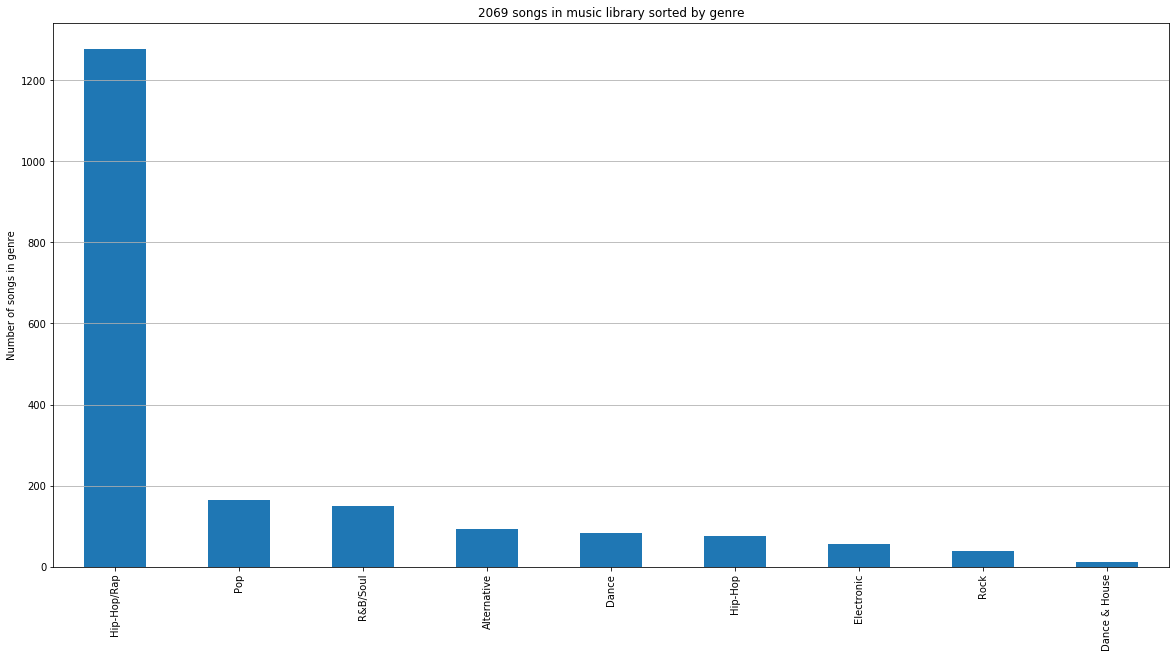

In [6]:
genre_bar = library_data["Genre"].value_counts()
genre_bar[genre_bar > 10].plot(kind='bar')
plt.ylabel('Number of songs in genre')
plt.title('{} songs in music library sorted by genre'.format(str(len(library_data['Title']))))
plt.axes().yaxis.grid()
plt.show()

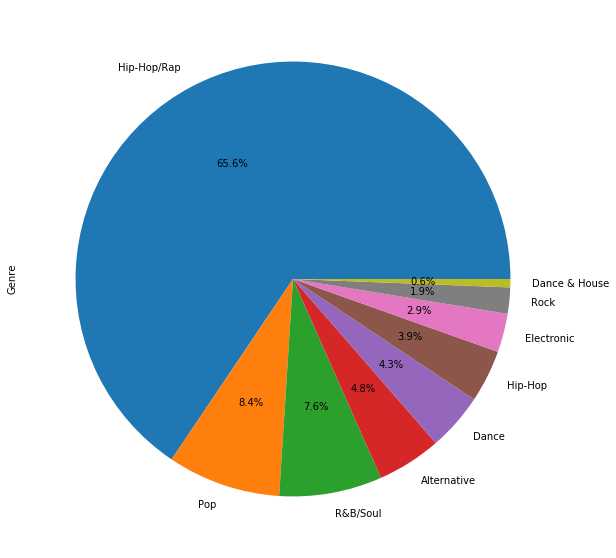

In [7]:
genre_pie = library_data["Genre"].value_counts()
genre_pie[genre_pie > 10].plot(kind='pie', autopct='%1.1f%%')


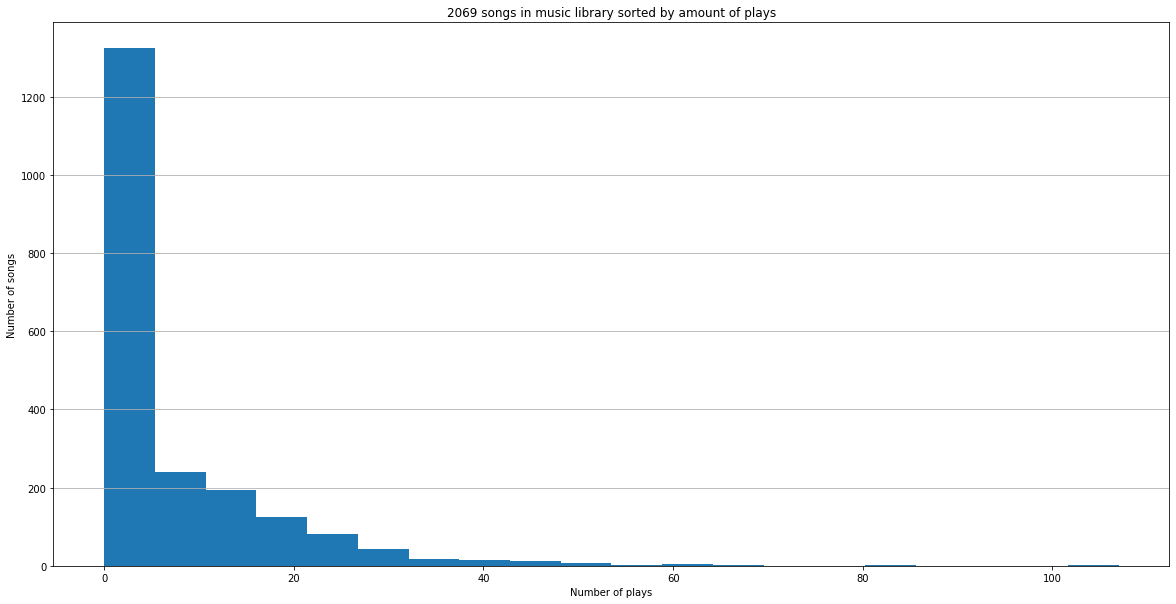

In [8]:
library_data['Track Play Count'].plot(kind='hist', bins=20)
plt.ylabel('Number of songs')
plt.xlabel('Number of plays')
plt.title('{} songs in music library sorted by amount of plays'.format(str(len(library_data['Title']))))
plt.axes().yaxis.grid()
plt.show()

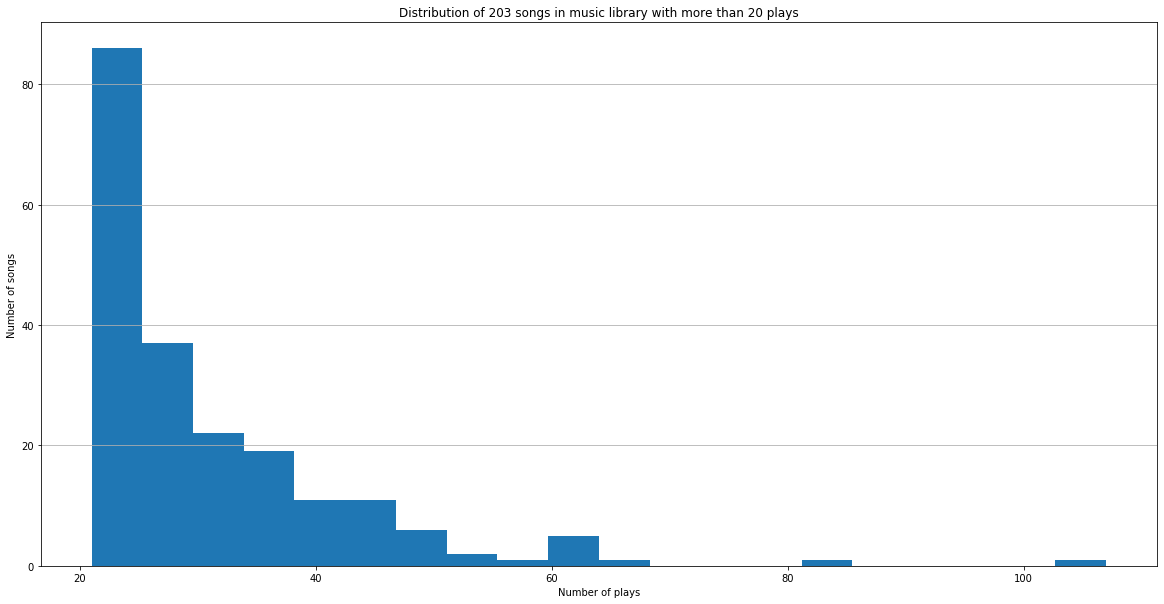

In [9]:
library_data['Track Play Count'][library_data['Track Play Count'] > 20].plot(kind='hist', bins=20)
plt.ylabel('Number of songs')
plt.xlabel('Number of plays')
plt.title('Distribution of {} songs in music library with more than 20 plays'.format(str(len(library_data['Track Play Count'][library_data['Track Play Count'] > 20]))))
plt.axes().yaxis.grid()
plt.show()

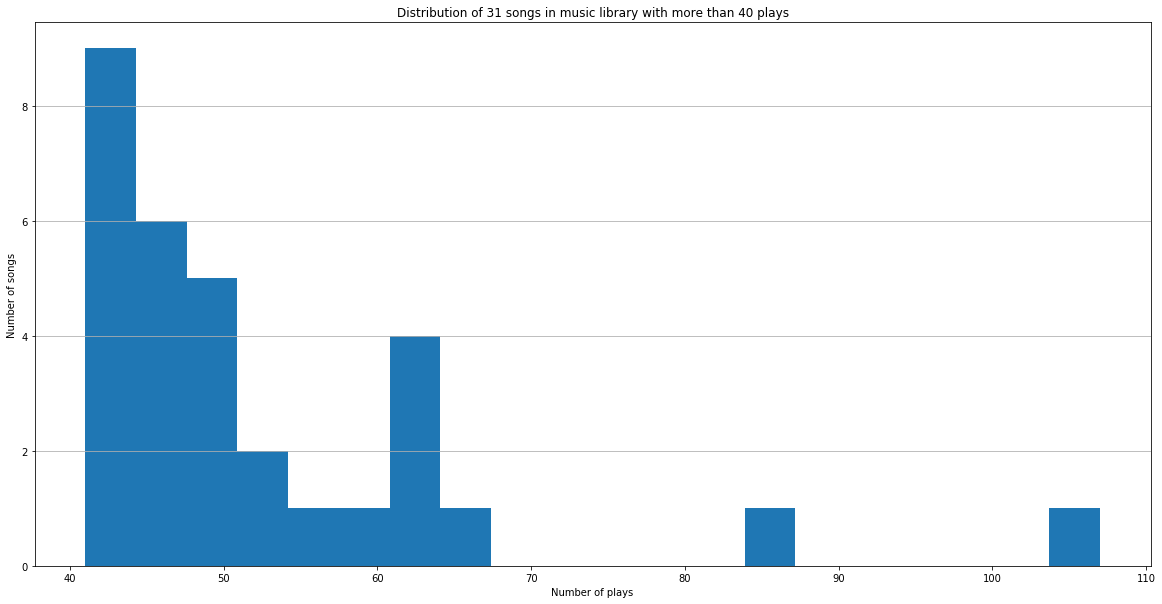

In [10]:
library_data['Track Play Count'][library_data['Track Play Count'] > 40].plot(kind='hist', bins=20)
plt.ylabel('Number of songs')
plt.xlabel('Number of plays')
plt.title('Distribution of {} songs in music library with more than 40 plays'.format(str(len(library_data['Track Play Count'][library_data['Track Play Count'] > 40]))))
plt.axes().yaxis.grid()
plt.show()

Let's find the songs that I definitely like far too much

In [11]:
plays = library_data[['Title', 'Artist', 'Track Play Count']]
plays[plays['Track Play Count'] > 55]
#107 plays * 173 seconds (play time) = 18511 seconds = 308.5 minutes = 5.14 hours of my life listening to one song!

,Title,Artist,Track Play Count
8,V. 3005,Childish Gambino,61
645,Let You Go,A$AP Ferg,66
1099,Jealousy,Roy Woods,84
1101,Instinct (feat. MadeinTYO),Roy Woods,107
1138,Questions,Chris Brown,61
1171,Lush Life,Zara Larsson,63
1215,How I Feel,Roy Woods,56
1216,Got Me,Roy Woods,60
1218,Sonic Boom,Roy Woods,62


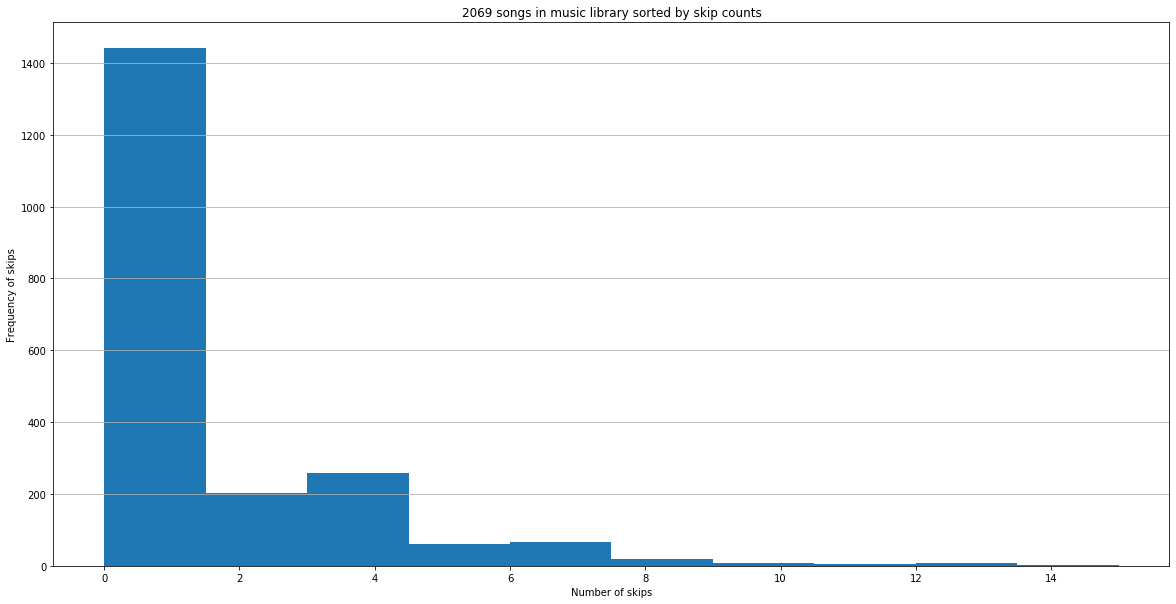

In [12]:
#library_data['Skip Count'].plot()
library_data['Skip Count'].plot(kind='hist', bins=10)
plt.xlabel('Number of skips')
plt.ylabel('Frequency of skips')
plt.axes().yaxis.grid()
plt.title('{} songs in music library sorted by skip counts'.format(str(len(library_data['Title']))))
plt.show()

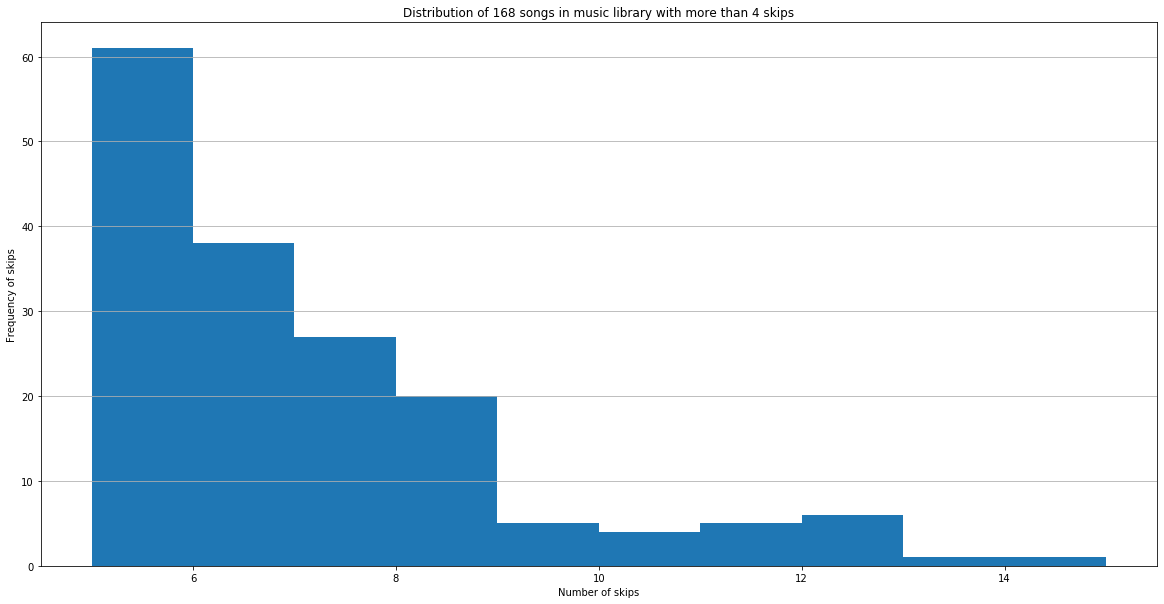

In [13]:
library_data['Skip Count'][library_data['Skip Count'] > 4].plot(kind='hist', bins=10)
plt.xlabel('Number of skips')
plt.ylabel('Frequency of skips')
plt.axes().yaxis.grid()
plt.title('Distribution of {} songs in music library with more than 4 skips'.format(str(len(library_data['Skip Count'][library_data['Skip Count'] > 4]))))
plt.show()

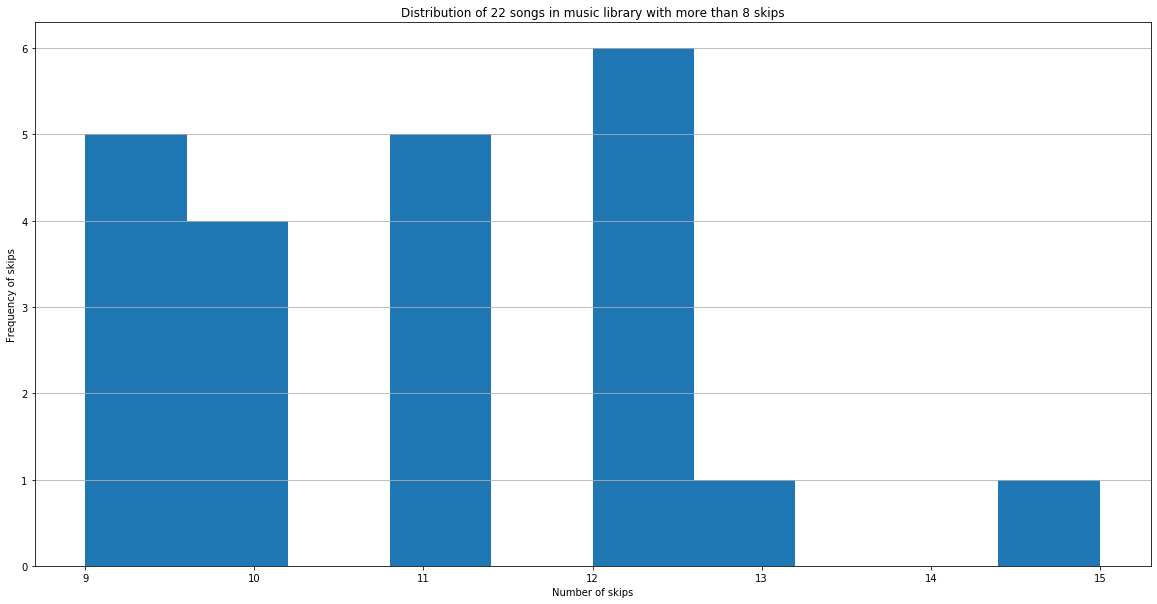

In [14]:
library_data['Skip Count'][library_data['Skip Count'] > 8].plot(kind='hist', bins=10)
plt.xlabel('Number of skips')
plt.ylabel('Frequency of skips')
plt.axes().yaxis.grid()
plt.title('Distribution of {} songs in music library with more than 8 skips'.format(str(len(library_data['Skip Count'][library_data['Skip Count'] > 8]))))
plt.show()

Let's find the songs that I should probably delete from my library

In [15]:
skips = library_data[['Title', 'Artist', 'Skip Count']]
skips[library_data['Skip Count'] > 11]

,Title,Artist,Skip Count
9,Playing Around Before the Party Starts,Childish Gambino,12
567,Be Yourself,Frank Ocean,13
622,Skin,Mac Miller,12
640,lose,Travis Scott,12
643,Let It Bang (feat. ScHoolboy Q),A$AP Ferg,12
1127,Romeo & Juliet,Trippie Redd,12
1129,Mega Man,Tay-K,15
1145,Neon Guts (feat. Pharrell Williams),Lil Uzi Vert,12


It is definitely no surprise that I don't actually like any of these songs at all. You might also notice that the first song in the list is also the shortest song in my library at a whopping 4.8 seconds.

<function matplotlib.pyplot.show(*args, **kw)>

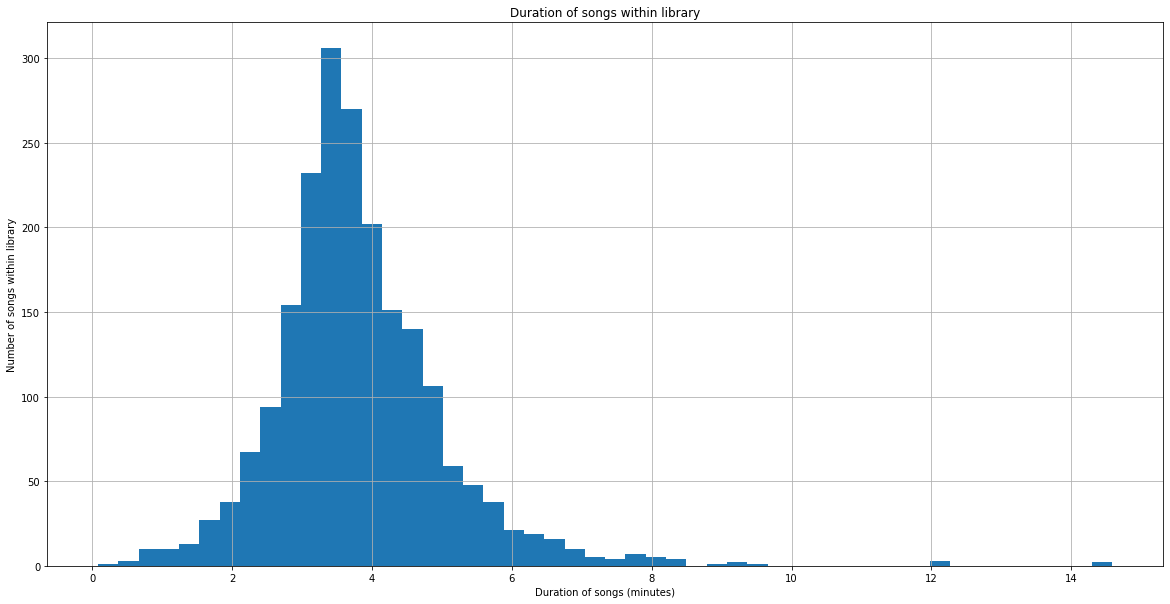

In [16]:
library_data["track_duration_minutes"] = library_data["Track Duration"] / 60000
library_data["track_duration_minutes"].hist(bins=50)
plt.xlabel('Duration of songs (minutes)')
plt.ylabel('Number of songs within library')
plt.title('Duration of songs within library')
plt.grid(True)
plt.show

In [17]:
titles_minutes = library_data[['Title', 'Artist', 'track_duration_minutes']]
titles_minutes[titles_minutes.track_duration_minutes > 10] #The longest songs in my library


,Title,Artist,track_duration_minutes
84,Note to Self,J. Cole,14.588083
217,Mortal Man,Kendrick Lamar,12.118367
227,"Sing About Me, I'm Dying of Thirst",Kendrick Lamar,12.059667
1015,AfricAryaN (feat. Neil deGrasse Tyson),Logic,12.140050
1064,Note to Self,J. Cole,14.588083


A lot of these songs are either towards the end of an album where the artist is doing their tributes and thankyous, or are extended skits/interludes.

In [18]:
library_data["track_duration_seconds"] = library_data["Track Duration"] / 1000
titles_seconds = library_data[['Title', 'Artist', 'track_duration_seconds']]
titles_seconds[titles_seconds.track_duration_seconds < 60] #The shortest songs in my library

,Title,Artist,track_duration_seconds
0,The Library (Intro),Childish Gambino,4.812
3,Dial Up,Childish Gambino,44.536
9,Playing Around Before the Party Starts,Childish Gambino,54.454
12,Death By Numbers,Childish Gambino,43.968
47,The Cube (Scene),Logic,27.235
55,Lucidity (Scene),Logic,55.807
86,Kerney Sermon (Skit),J. Cole,46.067
94,Where's Jermaine? (Skit),J. Cole,36.667
161,I Love Kanye,Kanye West,44.827
166,Frank's Track,Kanye West,38.333


A lot of these sub 60 second songs are short interludes between actual songs on an album where the artist tries to do a skit which tries to match the theme of the album (ie. Makes the album more unique and gives it a greater story and continuity)

<function matplotlib.pyplot.show(*args, **kw)>

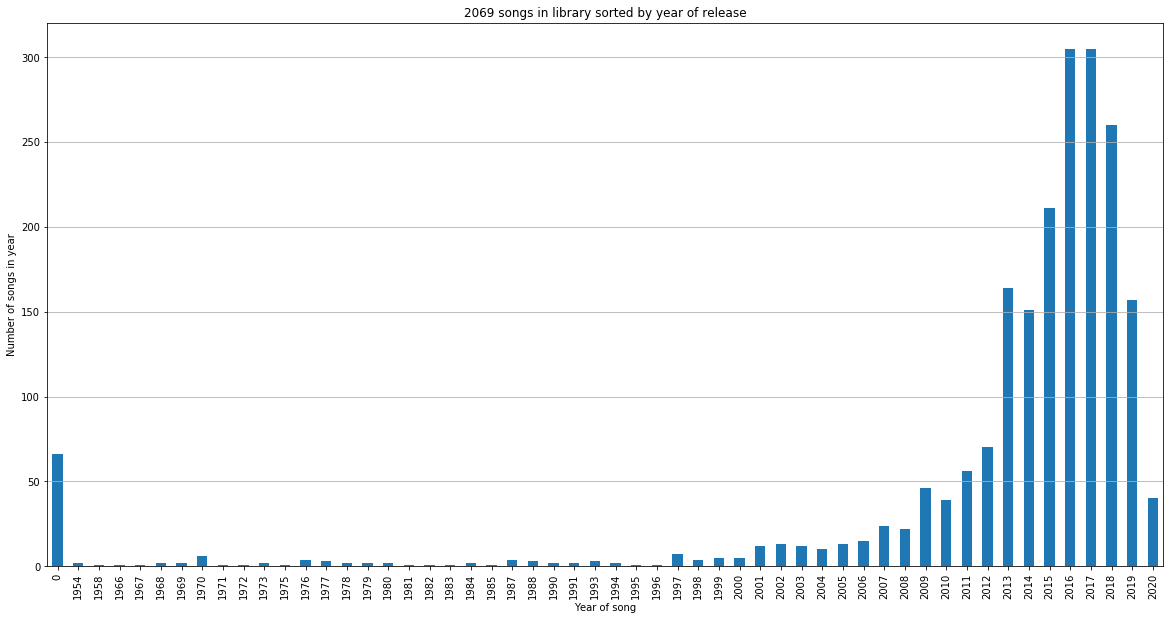

In [19]:
music_year = library_data['Track Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year of song')
plt.ylabel('Number of songs in year')
plt.title('{} songs in library sorted by year of release'.format(len(library_data['Track Year'])))
plt.axes().yaxis.grid()
plt.show

Text(0.5, 1.0, 'Song library distribution of songs with/without features')

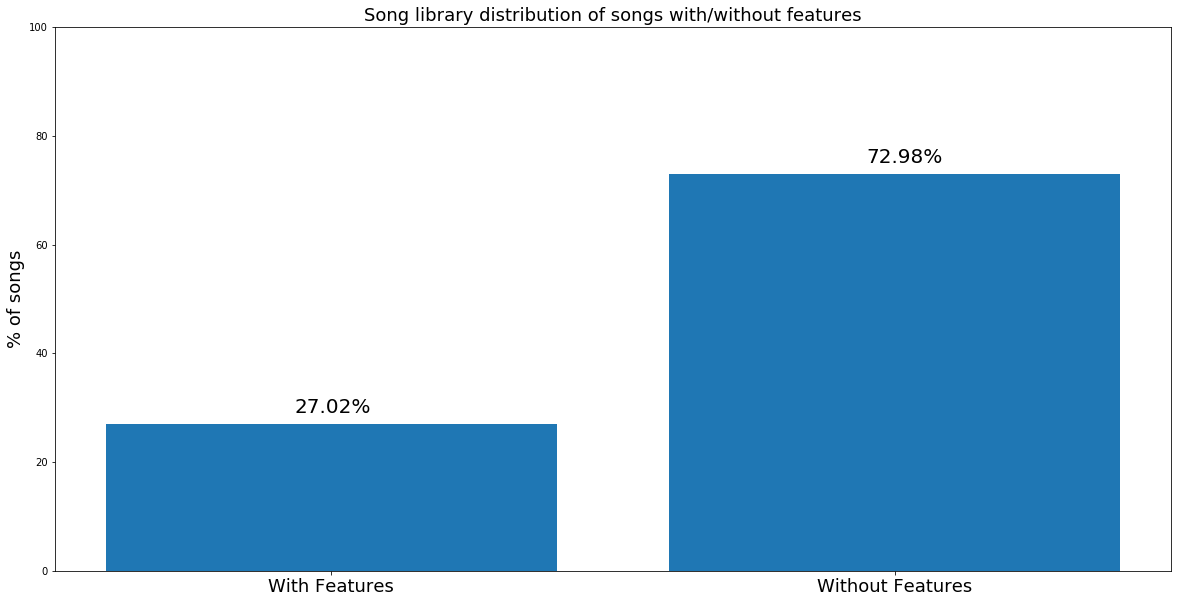

In [48]:
features = ['feat.' in song for song in library_data['Title']]
true_count = 0
false_count = 0
for i in features:
    if i == True:
        true_count += 100/2069
    if i == False:
        false_count += 100/2069
x_titles = ['With Features', 'Without Features']
feature_count = [true_count, false_count]
x_pos = [i for i, _ in enumerate(x_titles)]
plt.ylim(0, 100)
plt.bar(x_pos, feature_count)
plt.xticks(x_pos, x_titles, fontsize=18)
plt.annotate(str('%.2f' % true_count) + '%', xy=(0.25,0.315), xycoords='figure fraction', fontsize=20)
plt.annotate(str('%.2f' % false_count) + '%', xy=(0.735,0.73), xycoords='figure fraction', fontsize=20)
plt.ylabel('% ' + 'of songs', fontsize=18)
plt.title('Song library distribution of songs with/without features', fontsize=18)

In [21]:
listening_data

,Apple Id Number,Apple Music Subscription,Artist Name,Build Version,Client IP Address,Content Name,Content Provider,Content Specific Type,Device Identifier,End Position In Milliseconds,End Reason Type,Event End Timestamp,Event Reason Hint Type,Event Received Timestamp,Event Start Timestamp,Event Type,Feature Name,Genre,Item Type,Media Duration In Milliseconds,Media Type,Metrics Bucket Id,Metrics Client Id,Milliseconds Since Play,Offline,Original Title,Play Duration Milliseconds,Source Type,Start Position In Milliseconds,Store Country Name,UTC Offset In Seconds
0,358953842,True,Usher,"Music/3.1 iOS/10.3.1 model/iPhone6,2 hwp/s5l89...",58.168.9.126,U Remind Me,Sony Music,Song,79b330a05a148bd8cc479948ccb6f843db1af063,29198.0,SCRUB_END,2017-05-24T04:45:32.421Z,NOT_SPECIFIED,2017-05-24T04:45:41.139Z,2017-05-24T04:45:07.117Z,PLAY_END,search,R&B/Soul,ITUNES_STORE_CONTENT,266959.0,AUDIO,9459.0,3z4Rpr37z4qOz4dQzAFIz1DqXrfTQc,8718,False,NaN,25304.0,ORIGINATING_DEVICE,3894,Australia,36000
1,358953842,True,Anastacia,"Music/3.1 iOS/12.2 model/iPhone8,1 hwp/s8000 b...",2001:8003:2064:9300:8965:15b6:ca54:d28a,Left Outside Alone,Sony Music,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,1238.0,SCRUB_BEGIN,2019-04-22T01:25:46.439Z,NOT_SPECIFIED,2019-04-22T01:25:48.546Z,2019-04-22T01:25:45.201Z,PLAY_END,search / playlist_detail,Pop,ITUNES_STORE_CONTENT,258856.0,AUDIO,8552.0,3z3LHatpzH4nz4lszA0hz19OoAg8Tl,2107,False,NaN,1238.0,ORIGINATING_DEVICE,0,Australia,36000
2,358953842,True,Coldplay,"Music/3.1 iOS/13.3.1 model/iPhone8,1 hwp/s8000...",2001:8003:30cc:7f00:4b3:cac9:c4ff:afb1,Paradise,The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,1351.0,PLAYBACK_MANUALLY_PAUSED,2020-02-17T03:48:47.549Z,NOT_SPECIFIED,2020-02-17T03:48:48.314Z,2020-02-17T03:48:46.198Z,PLAY_END,library / songs,Alternative,ITUNES_STORE_CONTENT,277664.0,AUDIO,9278.0,3z3NMROKz46xz4SUzAeXz1GOvIePN9,765,False,NaN,1351.0,ORIGINATING_DEVICE,0,Australia,39600
3,358953842,True,Coldplay,"Music/3.1 iOS/13.3.1 model/iPhone8,1 hwp/s8000...",2001:8003:30cc:7f00:60cf:13ba:ea5a:a1e6,Paradise,The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,277664.0,NATURAL_END_OF_TRACK,2020-03-09T08:05:35.179Z,NOT_SPECIFIED,2020-03-09T08:05:35.281Z,2020-03-09T08:00:57.515Z,PLAY_END,library / songs,Alternative,ITUNES_STORE_CONTENT,277664.0,AUDIO,9278.0,3z3NMROKz46xz4SUzAeXz1GOvIePN9,102,False,NaN,277664.0,ORIGINATING_DEVICE,0,Australia,39600
4,358953842,True,Coldplay,"Music/3.1 iOS/13.4.1 model/iPhone8,1 hwp/s8000...",2001:8003:30cc:7f00:7d75:97d5:3cd7:c60c,Paradise,The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,686.0,TRACK_SKIPPED_FORWARDS,2020-06-01T02:04:11.579Z,NOT_SPECIFIED,2020-06-01T02:04:20.803Z,2020-06-01T02:04:10.893Z,PLAY_END,library / songs,Alternative,ITUNES_STORE_CONTENT,277664.0,AUDIO,9278.0,3z3NMROKz46xz4SUzAeXz1GOvIePN9,9224,False,NaN,686.0,ORIGINATING_DEVICE,0,Australia,36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128732,358953842,True,Drake,"Music/3.0 iOS/10.0.1 model/iPhone6,2 hwp/s5l89...",121.212.120.118,Pop Style,Universal Music International,Song,79b330a05a148bd8cc479948ccb6f843db1af063,213019.0,NATURAL_END_OF_TRACK,2017-01-30T05:32:11.149Z,NOT_SPECIFIED,2017-01-30T05:52:32.073Z,2017-01-30T05:28:38.130Z,PLAY_END,library / albums / album_detail,Hip Hop/Rap,ITUNES_STORE_CONTENT,213019.0,AUDIO,1393.0,3z1Cf16Uz8ltz4r5zBt2z1AfCS6iOS,1220924,True,NaN,213019.0,ORIGINATING_DEVICE,0,Australia,39600
128733,358953842,True,DJ Khaled,"Music/3.1 iOS/10.3.1 model/iPhone6,2 hwp/s5l89...",58.167.58.7,Wild Thoughts (feat. Rihanna & Bryson Tiller),Sony Music,Song,79b330a05a148bd8cc479948ccb6f843db1af063,109301.0,SCRUB_END,2017-06-19T13:31:09.239Z,NOT_SPECIFIED,2017-06-19T13:31:43.634Z,2017-06-19T13:30:31.545Z,PLAY_END,browse / browse / grouping,Hip Hop/Rap,ITUNES_STORE_CONTENT,204242.0,AUDIO,9459.0,3z4Rpr37z4qOz4dQzAFIz1DqXrfTQc,34395,False,NaN,37694.0,ORIGINA

In [22]:
listening_data.columns

Index(['Apple Id Number', 'Apple Music Subscription', 'Artist Name',
       'Build Version', 'Client IP Address', 'Content Name',
       'Content Provider', 'Content Specific Type', 'Device Identifier',
       'End Position In Milliseconds', 'End Reason Type',
       'Event End Timestamp', 'Event Reason Hint Type',
       'Event Received Timestamp', 'Event Start Timestamp', 'Event Type',
       'Feature Name', 'Genre', 'Item Type', 'Media Duration In Milliseconds',
       'Media Type', 'Metrics Bucket Id', 'Metrics Client Id',
       'Milliseconds Since Play', 'Offline', 'Original Title',
       'Play Duration Milliseconds', 'Source Type',
       'Start Position In Milliseconds', 'Store Country Name',
       'UTC Offset In Seconds'],
      dtype='object')

In [23]:
listening_data['End Reason Type'].value_counts()

NATURAL_END_OF_TRACK                         41732
TRACK_SKIPPED_FORWARDS                       33158
PLAYBACK_MANUALLY_PAUSED                     19246
MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM    14850
SCRUB_BEGIN                                   7626
SCRUB_END                                     7626
TRACK_SKIPPED_BACKWARDS                       2084
NOT_APPLICABLE                                 116
FAILED_TO_LOAD                                 115
PLAYBACK_STOPPED_DUE_TO_SESSION_TIMEOUT          1
Name: End Reason Type, dtype: int64

In [24]:
full_songs = listening_data[listening_data['End Reason Type'] == 'NATURAL_END_OF_TRACK']
full_songs

,Apple Id Number,Apple Music Subscription,Artist Name,Build Version,Client IP Address,Content Name,Content Provider,Content Specific Type,Device Identifier,End Position In Milliseconds,End Reason Type,Event End Timestamp,Event Reason Hint Type,Event Received Timestamp,Event Start Timestamp,Event Type,Feature Name,Genre,Item Type,Media Duration In Milliseconds,Media Type,Metrics Bucket Id,Metrics Client Id,Milliseconds Since Play,Offline,Original Title,Play Duration Milliseconds,Source Type,Start Position In Milliseconds,Store Country Name,UTC Offset In Seconds
3,358953842,True,Coldplay,"Music/3.1 iOS/13.3.1 model/iPhone8,1 hwp/s8000...",2001:8003:30cc:7f00:60cf:13ba:ea5a:a1e6,Paradise,The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,277664.0,NATURAL_END_OF_TRACK,2020-03-09T08:05:35.179Z,NOT_SPECIFIED,2020-03-09T08:05:35.281Z,2020-03-09T08:00:57.515Z,PLAY_END,library / songs,Alternative,ITUNES_STORE_CONTENT,277664.0,AUDIO,9278.0,3z3NMROKz46xz4SUzAeXz1GOvIePN9,102,False,NaN,277664.0,ORIGINATING_DEVICE,0,Australia,39600
11,358953842,True,Big Joe Turner,"Music/3.1 iOS/13.3.1 model/iPhone8,1 hwp/s8000...",120.18.60.79,"Shake, Rattle and Roll",The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,179722.0,NATURAL_END_OF_TRACK,2020-04-30T05:27:24.450Z,NOT_SPECIFIED,2020-04-30T05:27:25.374Z,2020-04-30T05:24:24.728Z,PLAY_END,search,R&B/Soul,ITUNES_STORE_CONTENT,179722.0,AUDIO,9278.0,3z3NMROKz46xz4SUzAeXz1GOvIePN9,924,False,NaN,179722.0,ORIGINATING_DEVICE,0,Australia,36000
15,358953842,True,Daniel Caesar,"Music/3.1 iOS/12.3.1 model/iPhone8,1 hwp/s8000...",2001:8003:2136:b600:cd5:4022:cad6:afab,FRONTAL LOBE MUZIK (feat. Pharrell Williams),The Orchard Enterprises Inc.,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,229459.0,NATURAL_END_OF_TRACK,2019-07-25T14:16:42.100Z,NOT_SPECIFIED,2019-07-25T14:16:42.322Z,2019-07-25T14:16:36.510Z,PLAY_END,library / playlist_detail,R&B/Soul,ITUNES_STORE_CONTENT,229459.0,AUDIO,8552.0,3z3LHatpzH4nz4lszA0hz19OoAg8Tl,222,False,NaN,5590.0,ORIGINATING_DEVICE,223869,Australia,36000
26,358953842,True,BROCKHAMPTON,"Music/3.1 iOS/10.3.1 model/iPhone6,2 hwp/s5l89...",110.150.187.11,HOTTIE,EMPIRE Distribution Inc.,Song,79b330a05a148bd8cc479948ccb6f843db1af063,197207.0,NATURAL_END_OF_TRACK,2018-01-18T07:09:45.690Z,NOT_SPECIFIED,2018-01-18T07:09:45.835Z,2018-01-18T07:06:29.852Z,PLAY_END,library / album_detail,Hip Hop/Rap,ITUNES_STORE_CONTENT,197207.0,AUDIO,341.0,3z1i2OJlz7igz4d0zCGczKApPXmp9,145,False,NaN,195838.0,ORIGINATING_DEVICE,1369,Australia,39600
27,358953842,True,Drake,"Music/3.1 iOS/12.4 model/iPhone8,1 hwp/s8000 b...",2001:8003:2136:b600:e8b3:30ce:94c:b3b2,Company (feat. Travi$ Scott),UMG Global,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,252702.0,NATURAL_END_OF_TRACK,2019-08-25T12:42:25.379Z,NOT_SPECIFIED,2019-08-25T12:42:25.517Z,2019-08-25T12:38:12.677Z,PLAY_END,library / playlist_detail,Hip Hop/Rap,ITUNES_STORE_CONTENT,252702.0,AUDIO,4589.0,3z2uIdPHzEsYz59hz9trzygSQbDwM,138,False,NaN,252702.0,ORIGINATING_DEVICE,0,Australia,36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128717,358953842,True,"Giggs, AJ Tracey","Music/3.1 iOS/12.1.2 model/iPhone8,1 hwp/s8000...",2001:8003:20bb:b00:10f6:583c:f239:78c4,Nothing But Net,The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,187895.0,NATURAL_END_OF_TRACK,2019-02-10T22:15:12.788Z,NOT_SPECIFIED,2019-02-11T00:49:13.625Z,2019-02-10T22:12:04.893Z,PLAY_END,library / playlist_detail,Hip Hop/Rap,ITUNES_STORE_CONTENT,187895.0,AUDIO,3974.0,3z49j34Uz5R4z4iCz9taz1Kn3j664k,9240837,True,NaN,187895.0,ORIGINATING_DEVICE,0,Australia,39600
128719,358953842,True,A Boogie wit da Hoodie,"Music/3.1 iOS/12.1.2 model/iPhone8,1 hwp/s8000...",2001:8003:20bb:b00:1dc3:b411:2c52:523d,I Did It,The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,215365.0,NATURAL_END_OF_TRACK,2019-01-27T08:47:11.134Z,NOT_SPECIFIED,2019-01-27T08:47:11.259Z,2019

In [25]:
full_songs.columns

Index(['Apple Id Number', 'Apple Music Subscription', 'Artist Name',
       'Build Version', 'Client IP Address', 'Content Name',
       'Content Provider', 'Content Specific Type', 'Device Identifier',
       'End Position In Milliseconds', 'End Reason Type',
       'Event End Timestamp', 'Event Reason Hint Type',
       'Event Received Timestamp', 'Event Start Timestamp', 'Event Type',
       'Feature Name', 'Genre', 'Item Type', 'Media Duration In Milliseconds',
       'Media Type', 'Metrics Bucket Id', 'Metrics Client Id',
       'Milliseconds Since Play', 'Offline', 'Original Title',
       'Play Duration Milliseconds', 'Source Type',
       'Start Position In Milliseconds', 'Store Country Name',
       'UTC Offset In Seconds'],
      dtype='object')

In [26]:
full_songs['Play Duration Milliseconds'].sum() / (1000*60*60*24)

95.19415258101851

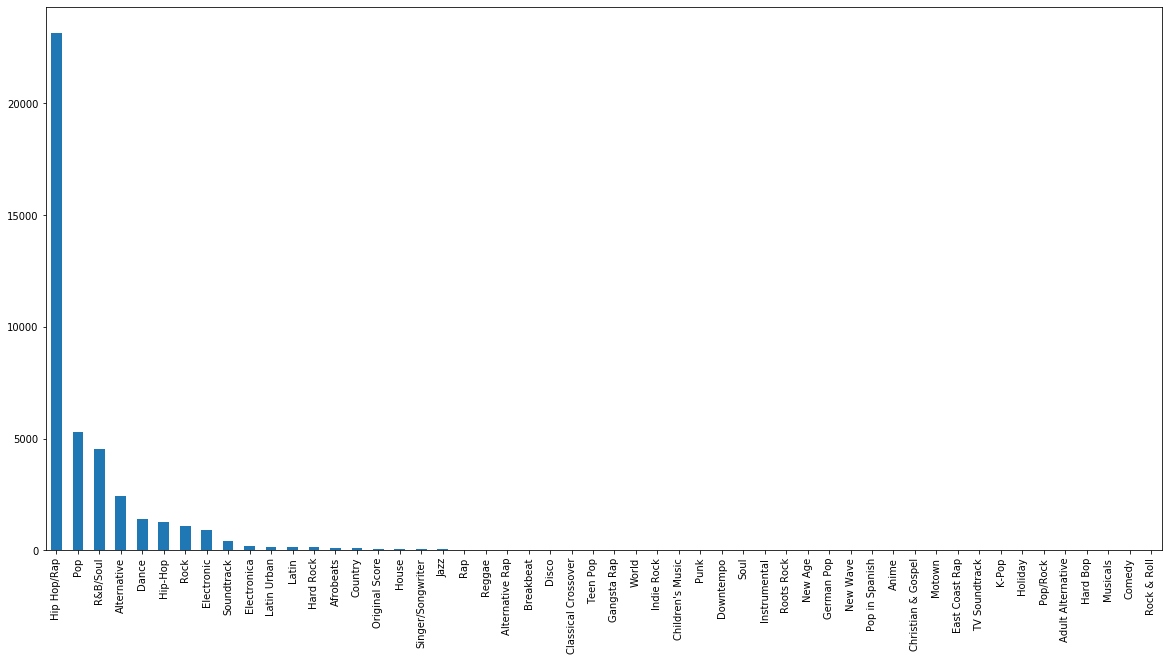

In [27]:
full_songs['Genre'].value_counts().plot(kind='bar')

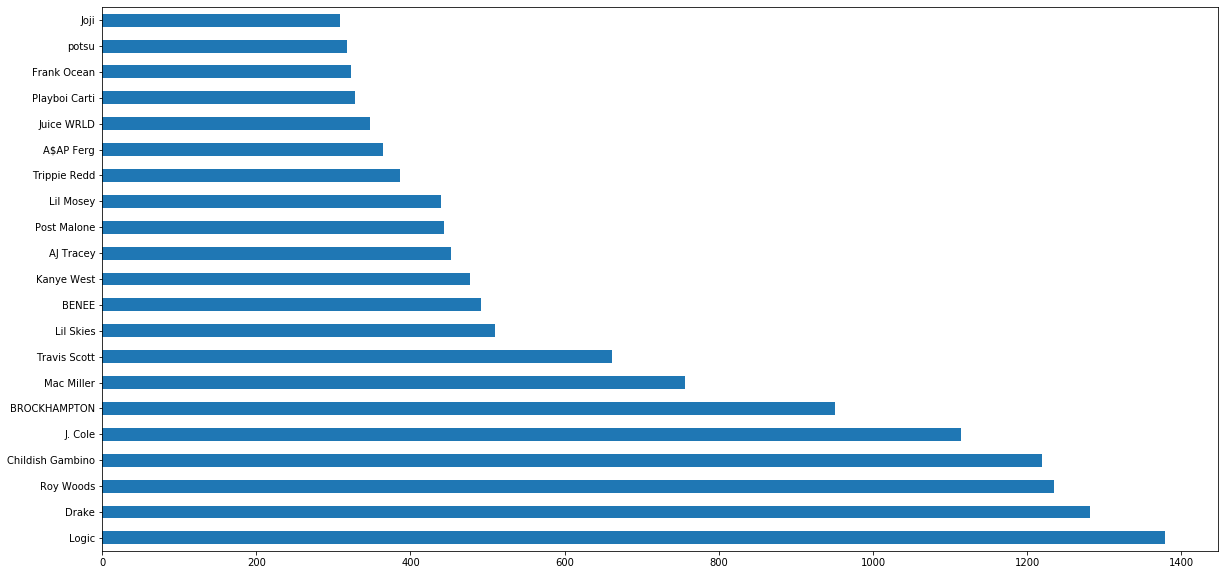

In [28]:
listened_to_artists = full_songs['Artist Name'].value_counts()
listened_to_artists[0:21].plot(kind='barh')

In [29]:
full_songs[['Artist Name', 'Content Name', 'Genre']].iloc[11771]

Artist Name                            Machine Gun Kelly
Content Name    Trap Paris (feat. Quavo & Ty Dolla $ign)
Genre                                        Hip Hop/Rap
Name: 36300, dtype: object

In [30]:
skipped_songs = listening_data[listening_data['End Reason Type'] == 'TRACK_SKIPPED_FORWARDS']
skipped_songs

,Apple Id Number,Apple Music Subscription,Artist Name,Build Version,Client IP Address,Content Name,Content Provider,Content Specific Type,Device Identifier,End Position In Milliseconds,End Reason Type,Event End Timestamp,Event Reason Hint Type,Event Received Timestamp,Event Start Timestamp,Event Type,Feature Name,Genre,Item Type,Media Duration In Milliseconds,Media Type,Metrics Bucket Id,Metrics Client Id,Milliseconds Since Play,Offline,Original Title,Play Duration Milliseconds,Source Type,Start Position In Milliseconds,Store Country Name,UTC Offset In Seconds
4,358953842,True,Coldplay,"Music/3.1 iOS/13.4.1 model/iPhone8,1 hwp/s8000...",2001:8003:30cc:7f00:7d75:97d5:3cd7:c60c,Paradise,The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,686.0,TRACK_SKIPPED_FORWARDS,2020-06-01T02:04:11.579Z,NOT_SPECIFIED,2020-06-01T02:04:20.803Z,2020-06-01T02:04:10.893Z,PLAY_END,library / songs,Alternative,ITUNES_STORE_CONTENT,277664.0,AUDIO,9278.0,3z3NMROKz46xz4SUzAeXz1GOvIePN9,9224,False,NaN,686.0,ORIGINATING_DEVICE,0,Australia,36000
7,358953842,True,MadeinTYO,"Music/3.1 iOS/12.4 model/iPhone8,1 hwp/s8000 b...",120.18.162.126,Lil Bih (feat. 24hrs),The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,316.0,TRACK_SKIPPED_FORWARDS,2019-09-03T00:56:33.790Z,NOT_SPECIFIED,2019-09-03T00:56:33.925Z,2019-09-03T00:56:33.474Z,PLAY_END,library / albums,Hip Hop/Rap,ITUNES_STORE_CONTENT,170062.0,AUDIO,4589.0,3z2uIdPHzEsYz59hz9trzygSQbDwM,135,False,NaN,316.0,ORIGINATING_DEVICE,0,Australia,36000
8,358953842,True,Anderson .Paak,"Music/3.1 iOS/12.0 model/iPhone8,1 hwp/s8000 b...",120.18.72.227,Tints (feat. Kendrick Lamar),The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,2936.0,TRACK_SKIPPED_FORWARDS,2018-11-22T06:01:57.399Z,NOT_SPECIFIED,2018-11-22T06:01:57.627Z,2018-11-22T06:01:54.463Z,PLAY_END,library / playlist_detail,Hip Hop/Rap,ITUNES_STORE_CONTENT,268469.0,AUDIO,3974.0,3z49j34Uz5R4z4iCz9taz1Kn3j664k,228,False,NaN,2936.0,ORIGINATING_DEVICE,0,Australia,39600
9,358953842,True,Logic,"Music/3.1 iOS/12.4.1 model/iPhone8,1 hwp/s8000...",120.18.49.67,Out of Sight,UMG Global,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,279.0,TRACK_SKIPPED_FORWARDS,2019-09-10T00:29:10.991Z,NOT_SPECIFIED,2019-09-10T00:45:01.728Z,2019-09-10T00:29:10.712Z,PLAY_END,library / songs,Hip Hop/Rap,ITUNES_STORE_CONTENT,137996.0,AUDIO,4589.0,3z2uIdPHzEsYz59hz9trzygSQbDwM,950737,True,NaN,279.0,ORIGINATING_DEVICE,0,Australia,36000
12,358953842,True,Kendrick Lamar,"Music/3.0 iOS/10.0.1 model/iPhone6,2 hwp/s5l89...",58.166.212.49,i,Universal Music International,Song,79b330a05a148bd8cc479948ccb6f843db1af063,134975.0,TRACK_SKIPPED_FORWARDS,2017-01-10T04:54:31.101Z,NOT_SPECIFIED,2017-01-10T05:36:26.547Z,2017-01-10T04:54:28.213Z,PLAY_END,library / albums,Hip Hop/Rap,ITUNES_STORE_CONTENT,336062.0,AUDIO,1393.0,3z1Cf16Uz8ltz4r5zBt2z1AfCS6iOS,2515446,True,NaN,2888.0,ORIGINATING_DEVICE,132087,Australia,39600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128702,358953842,True,Joey Bada$$,"Music/3.1 iOS/11.4.1 model/iPhone8,1 hwp/s8000...",60.227.47.190,TEMPTATION,The Orchard Enterprises Inc.,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,1911.0,TRACK_SKIPPED_FORWARDS,2018-09-25T13:33:47.640Z,NOT_SPECIFIED,2018-09-25T13:33:48.132Z,2018-09-25T13:33:45.729Z,PLAY_END,library / albums,Hip Hop/Rap,ITUNES_STORE_CONTENT,244250.0,AUDIO,6999.0,3z4yEJmpzCpFz5G4z93yzXbi1I7UU,492,False,NaN,1911.0,ORIGINATING_DEVICE,0,Australia,36000
128718,358953842,True,Meek Mill,"Music/3.1 iOS/12.3.1 model/iPhone8,1 hwp/s8000...",129.94.8.214,Going Bad (feat. Drake),The Warner Music Group,Song,458d24b37aa0e1eba6341f6f7ee4c70aee891796,719.0,TRACK_SKIPPED_FORWARDS,2019-07-01T07:28:07.183Z,NOT_SPECIFIED,2019-07-01T07:46:07.367Z,2019-07-01T07:28:06.464Z,PLAY_END,library / albums,Hip Hop/Rap,ITUNES_STORE_CONTENT,180581.0,AUDIO,8552.0,3z3LHatpzH4nz4lszA0hz19OoAg8Tl,1080184,True,NaN,719.0,ORIGINATING_DEVICE,

In [31]:
skipped = skipped_songs['Content Name'].value_counts()
skipped.iloc[0:11]

Intro                      79
Location                   64
A Tale of 2 Citiez         63
03' Adolescence            63
The Show Goes On           60
Fire Squad                 59
St. Tropez                 58
lose                       56
Be Yourself                56
Blessings (feat. Drake)    56
Hello                      54
Name: Content Name, dtype: int64

Text(0.5, 1.0, '2069 songs categorised by number of songs on related album')

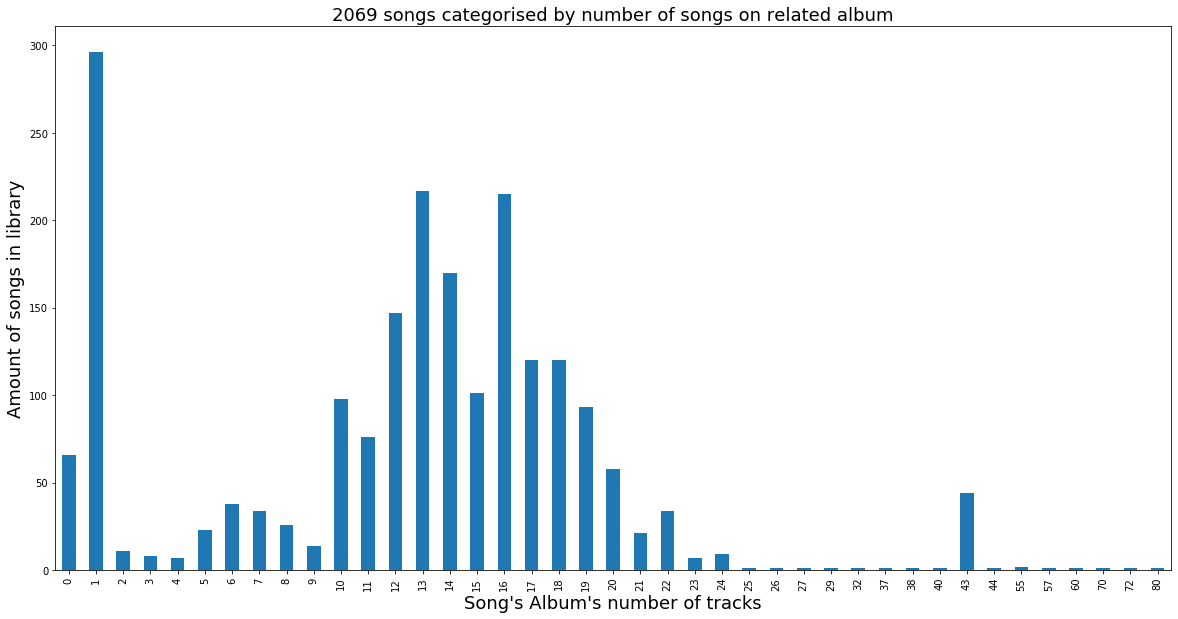

In [32]:
library_data['Track Count On Album'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Song's Album's number of tracks", fontsize=18)
plt.ylabel("Amount of songs in library", fontsize=18)
plt.title('{} songs categorised by number of songs on related album'.format(len(library_data)), fontsize=18)
#I listen to a lot of singles rather than songs that are apart of album
#Who knew an album could have 80 songs
#The large amount of songs from an album of 43 songs is because I downloaded a large compilation album from ministry of sound called 'Ministry of Sound - The Annual 2014'. I don't even remember doing this

In [33]:
library_data[(library_data['Track Count On Album'] == 1) & (library_data['Track Number On Album'] == 1)]
#These are all the singles in my library


,Content Type,Track Identifier,Title,Sort Name,Artist,Sort Artist,Is Part of Compilation,Album,Sort Album,Album Artist,Genre,Track Year,Track Number On Album,Track Count On Album,Disc Number Of Album,Disc Count Of Album,Track Duration,Track Play Count,Date Added To Library,Date Added To iCloud Music Library,Last Modified Date,Last Played Date,Skip Count,Date of Last Skip,Is Purchased,Audio File Extension,Is Checked,Copyright,Release Date,Purchased Track Identifier,Apple Music Track Identifier,Composer,track_duration_minutes,track_duration_seconds
103,Song,182859274,Know Me From,Know Me From,Stormzy,Stormzy,False,Know Me From - Single,Know Me From - Single,Stormzy,Hip-Hop/Rap,2015,1,1,1,1,193714,9,2016-07-05T21:06:11Z,2016-07-05T21:06:11Z,2016-07-05T21:06:11Z,2018-08-16T00:12:17Z,2,2018-05-12T05:34:30Z,False,m4a,False,℗ 2015 Stormzy,2015-03-08T00:00:00Z,9.728678e+08,9.728678e+08,NaN,3.228567,193.714
150,Song,182860062,Peso,Peso,A$AP Rocky,A$AP Rocky,False,Peso - Single,Peso - Single,A$AP Rocky,Hip-Hop/Rap,2011,1,1,1,1,170307,1,2016-07-05T21:08:36Z,2016-07-05T21:08:36Z,2016-07-05T21:08:36Z,2018-04-23T00:59:20Z,1,2017-01-03T02:09:30Z,False,m4a,False,℗ 2011 A$AP Rocky Recordings LLC/RCA Records. ...,2011-10-31T00:00:00Z,4.814880e+08,4.814880e+08,"James Harris, Rakim Mayers, Terry Lewis & Tysh...",2.838450,170.307
151,Song,182860066,Multiply (feat. Juicy J),Multiply (feat. Juicy J),A$AP Rocky,A$AP Rocky,False,Multiply (feat. Juicy J) - Single,Multiply (feat. Juicy J) - Single,A$AP Rocky,Hip-Hop/Rap,2014,1,1,1,1,223053,1,2016-07-05T21:08:45Z,2016-07-05T21:08:45Z,2016-07-05T21:08:45Z,2018-06-12T00:36:53Z,4,2018-03-03T20:21:34Z,False,m4a,False,℗ 2014 A$AP Rocky Recordings LLC/RCA Records. ...,2014-10-03T00:00:00Z,9.255036e+08,9.255036e+08,"Rakim Mayers, Anthony Lamont Wharton II, Jorda...",3.717550,223.053
152,Song,182860070,"Everyday (feat. Rod Stewart, Miguel & Mark Ron...","Everyday (feat. Rod Stewart, Miguel & Mark Ron...",A$AP Rocky,A$AP Rocky,False,"Everyday (feat. Rod Stewart, Miguel & Mark Ron...","Everyday (feat. Rod Stewart, Miguel & Mark Ron...",A$AP Rocky,Hip-Hop/Rap,2015,1,1,1,1,261027,0,2016-07-05T21:09:04Z,2016-07-05T21:09:04Z,2016-07-05T21:09:04Z,NaN,0,NaN,False,m4a,False,℗ 2015 A$AP Rocky Recordings LLC/RCA Records,2015-05-08T00:00:00Z,9.930192e+08,9.930192e+08,"Mark Ronson, Rakim Mayers, Miguel & David Keit...",4.350450,261.027
196,Song,182860846,"See Me Now (feat. Big Sean, Beyoncé & Charlie ...","See Me Now (feat. Big Sean, Beyoncé & Charlie ...",Kanye West,Kanye West,False,My Beautiful Dark Twisted Fantasy,My Beautiful Dark Twisted Fantasy,Kanye West,Hip-Hop/Rap,2010,1,1,2,2,363867,0,2016-07-05T21:11:10Z,2016-07-05T21:11:10Z,2016-07-05T21:11:10Z,NaN,0,NaN,False,m4a,False,"℗ 2010 Roc-A-Fella Records, LLC",2010-11-22T04:00:00Z,4.039689e+08,4.039689e+08,"Ernest Wilson, Kanye West, Beyoncé Knowles, Br...",6.064450,363.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,Song,182894862,Say It Again (feat. A$AP Ferg),Say It Again (feat. A$AP Ferg),Onefour,Onefour,False,Say It Again (feat. A$AP Ferg) - Single,Say It Again (feat. A$AP Ferg) - Single,Onefour,Hip-Hop/Rap,2020,1,1,1,1,261517,0,2020-05-07T05:26:52Z,2020-05-07T05:26:52Z,2020-05-07T05:26:52Z,NaN,0,NaN,False,m4a,False,℗ 2020 ONEFOUR,2020-05-06T00:00:00Z,1.511196e+09,1.511196e+09,"Spencer Magalogo, Jerome Misa & Darold Brown",4.358617,261.517
2052,Song,182894870,Feel the Way I Do,Feel the Way I Do,The Jungle Giants,Jungle Giants,False,Feel the Way I Do - Single,Feel the Way I Do - Single,The Jungle Giants,Alternative,2017,1,1,1,1,202606,0,2020-05-15T05:31:42Z,2020-05-15T05:31:42Z,2020-05-15T05:31:42Z,NaN,0,NaN,False,m4a,False,℗ 2017 Amplifire Music,2017-01-31T04:00:00Z,1.198928e+09,1.198928e+09,NaN,3.376767,202.606
2056,Song,182894886,What It Is,What It Is,KYLE,KYLE,False,What It Is - Single,What It Is - Single,KYLE,R&B/Soul,2020,1,1,1,1,145063,0,2020-05-21T01:23:56Z,2

In [34]:
library_data[library_data['Track Number On Album'] == 0]
#These are songs added from itunes library not apple music (ie. songs which have been downloaded not streamed)

,Content Type,Track Identifier,Title,Sort Name,Artist,Sort Artist,Is Part of Compilation,Album,Sort Album,Album Artist,Genre,Track Year,Track Number On Album,Track Count On Album,Disc Number Of Album,Disc Count Of Album,Track Duration,Track Play Count,Date Added To Library,Date Added To iCloud Music Library,Last Modified Date,Last Played Date,Skip Count,Date of Last Skip,Is Purchased,Audio File Extension,Is Checked,Copyright,Release Date,Purchased Track Identifier,Apple Music Track Identifier,Composer,track_duration_minutes,track_duration_seconds
886,Song,182873606,Mac Miller - Earth (feat. Future) Official Audio,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,257306,8,2014-01-14T02:21:33Z,2017-04-16T06:22:50Z,2014-01-14T02:12:04Z,2018-07-26T03:18:03Z,1,2017-10-31T20:41:46Z,False,mp3,False,NaN,NaN,NaN,766830009.0,NaN,4.288433,257.306
887,Song,182873610,Mac Miller - In The Morning (ft. Syd &amp; Thu...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,265325,8,2014-01-14T02:21:33Z,2017-04-16T06:22:50Z,2014-01-14T02:09:18Z,2018-07-26T03:28:55Z,0,NaN,False,mp3,False,NaN,NaN,NaN,766830043.0,NaN,4.422083,265.325
888,Song,182873614,Armin van Buuren feat. Cindy Alma - Don't Want...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,468401,0,2014-01-14T02:21:33Z,2017-04-16T06:22:50Z,2014-01-14T02:04:28Z,NaN,0,NaN,False,mp3,False,NaN,NaN,NaN,NaN,NaN,7.806683,468.401
889,Song,182873618,Flume - Change,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,150491,5,2014-01-14T02:21:33Z,2017-04-16T06:22:50Z,2014-01-14T02:02:22Z,2018-07-02T21:41:26Z,5,2018-07-19T20:49:14Z,False,mp3,False,NaN,NaN,NaN,NaN,NaN,2.508183,150.491
890,Song,182873622,Dave Spoon - At Night (Shadow Child &amp; T.Wi...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,359053,2,2014-01-14T02:21:33Z,2017-04-16T06:22:50Z,2014-01-14T01:56:08Z,2014-11-14T00:33:54Z,0,NaN,False,mp3,False,NaN,NaN,NaN,NaN,NaN,5.984217,359.053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Song,182874658,Grizzly Bear - Will Calls (Diplo Remix),NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,246778,1,2014-03-01T01:11:16Z,2017-04-16T06:22:50Z,2014-02-28T16:10:06Z,2014-10-31T21:59:32Z,0,NaN,False,mp3,False,NaN,NaN,NaN,NaN,NaN,4.112967,246.778
950,Song,182874662,Kyla La Grange - Cut Your Teeth (Asdek Remix),NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,372688,2,2014-03-01T01:11:16Z,2017-04-16T06:22:50Z,2014-02-28T16:28:23Z,2014-11-11T00:27:01Z,0,NaN,False,mp3,False,NaN,NaN,NaN,NaN,NaN,6.211467,372.688
951,Song,182874666,Neon Indian - Polish Girl,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,264698,0,2014-03-01T01:11:16Z,2017-04-16T06:22:50Z,2014-02-28T16:42:11Z,NaN,2,2017-12-17T05:27:26Z,False,mp3,False,NaN,NaN,NaN,579376271.0,NaN,4.411633,264.698
952,Song,182874670,Panama - Always (Wave Racer Remix),NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0,0,0,0,0,222746,0,2014-03-01T01:11:16Z,2017-04-16T06:22:50Z,2014-02-28T16:00:47Z,NaN,0,NaN,False,mp3,False,NaN,NaN,NaN,NaN,NaN,3.712433,222.746


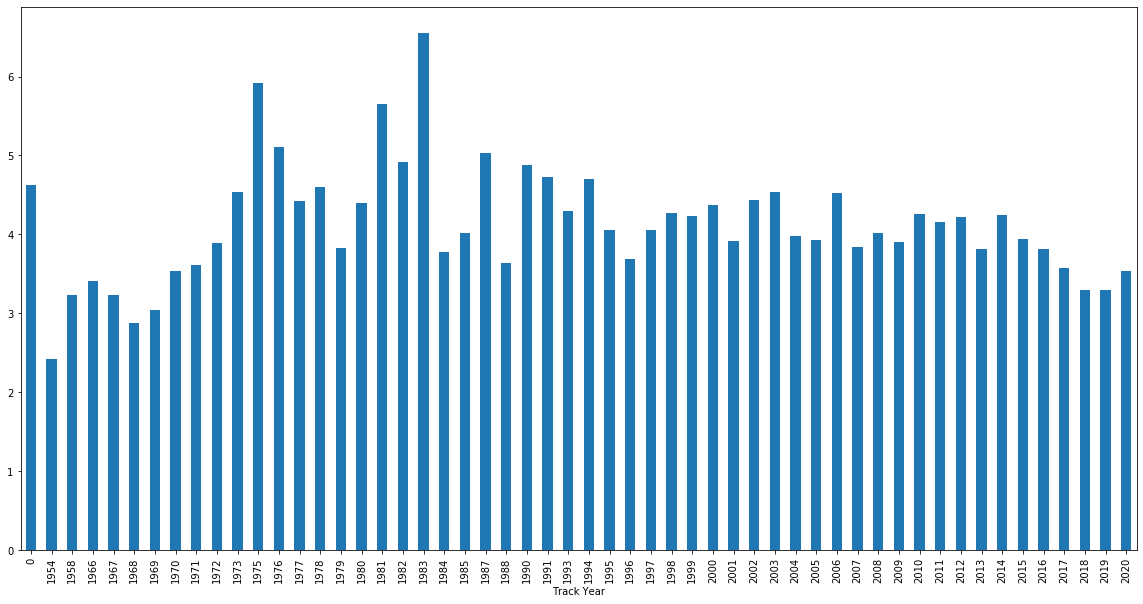

In [35]:
bruhs = library_data.groupby('Track Year').mean()
bruhs['track_duration_minutes'].plot(kind='bar')

,Track Identifier,Is Part of Compilation,Track Year,Track Number On Album,Track Count On Album,Disc Number Of Album,Disc Count Of Album,Track Duration,Track Play Count,Skip Count,Is Purchased,Is Checked,Purchased Track Identifier,Apple Music Track Identifier,track_duration_minutes,track_duration_seconds
Artist,,,,,,,,,,,,,,,,
$tupid Young & Pacman da Gunman,1.828931e+08,0.0,2019.000000,10.0,14.000000,1.0,1.0,146880.000000,0.000000,0.0,0.0,0.0,1.475825e+09,1.475825e+09,2.448000,146.880000
*NSYNC,1.828859e+08,0.0,2000.000000,1.0,16.000000,1.0,1.0,200560.000000,0.000000,0.0,0.0,0.0,2.559856e+08,2.559856e+08,3.342667,200.560000
16yrold & KILLY,1.828790e+08,0.0,2017.000000,1.0,1.000000,1.0,1.0,137200.000000,14.000000,8.0,0.0,0.0,1.288293e+09,1.288293e+09,2.286667,137.200000
20syl,1.828941e+08,0.0,2014.000000,3.5,5.000000,1.0,1.0,252120.000000,0.000000,0.0,0.0,0.0,1.202273e+09,1.202273e+09,4.202000,252.120000
21 Savage,1.828775e+08,0.0,2017.000000,1.5,14.000000,1.0,1.0,227293.500000,9.000000,4.0,0.0,0.0,1.254352e+09,1.254352e+09,3.788225,227.293500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iann dior,1.828951e+08,0.0,2019.000000,13.0,15.000000,1.0,1.0,134000.000000,0.000000,0.0,0.0,0.0,1.484727e+09,1.484727e+09,2.233333,134.000000
omniboi,1.828803e+08,0.0,2017.000000,1.0,1.000000,1.0,1.0,122327.000000,13.000000,3.0,0.0,0.0,1.264932e+09,1.264932e+09,2.038783,122.327000
potsu,1.828817e+08,0.0,2017.500000,7.3,14.200000,1.0,1.0,157498.200000,7.500000,1.3,0.0,0.0,1.402260e+09,1.402260e+09,2.624970,157.498200


<function matplotlib.pyplot.show(*args, **kw)>

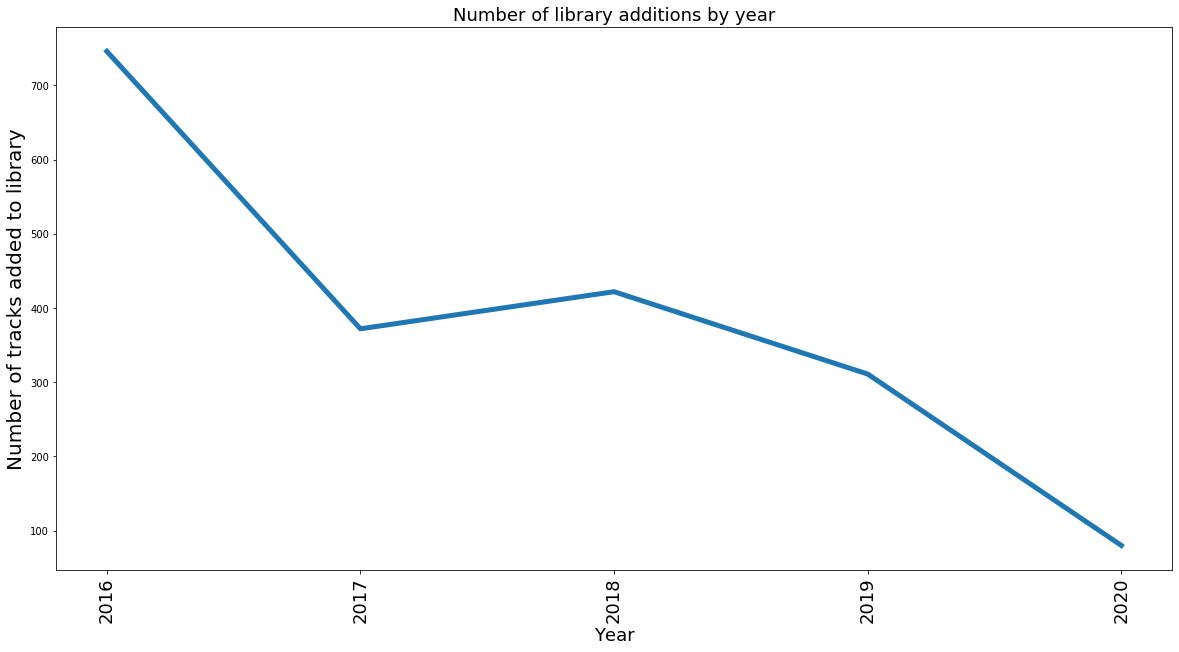

In [78]:
def additions_by_year():
    year_songs = []
    for i in range(2016,2021):
        year_added = [str(i) in song for song in library_data['Date Added To Library']]
        true_count = 0
        for j in year_added:
            if j == True:
                true_count += 1
        year_songs.append(true_count)
    x_titles = ['2016', '2017', '2018', '2019', '2020']
    x_pos = [i for i, _ in enumerate(x_titles)]
    plt.plot(x_pos, year_songs, linewidth=5)
    plt.xticks(x_pos, x_titles, fontsize=18, rotation='vertical')
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Number of tracks added to library', fontsize=20)
    plt.title('Number of library additions by year', fontsize=18)

    return(plt.show)
additions_by_year()

In [100]:
def additions_by_month():
    i = list(range(2016,2021))
    j = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    month_list = []
    for year in i:
        for month in j:
            month_list.append('{}-{}'.format(i, j))
            
    for month in month_list:
        year_month_added = [str(month) in song for song in library_data['Date Added To Library']]
        song_count = []
        true_count = 0
        for i in year_month_added:
            if i == True:
                true_count += 1
            song_count.append(true_count)
    